**PROJECT PHASE 2**

**Regression**

TEAM- Carbon Cutters

TEAM MEMBERS- Parminder Kaur , Vishaldeep Singh , Jaspinderjit Singh

Classification

Machine Learning problem  2:

Has the federal carbon pricing system (started in 2019) decreased emissions of nitrogen oxides and carbon monoxide (substances releases from burning fossil fuels)? And if so, what are the predicted decreases in the release of these substances as the carbon pricing system gradually increases in price?





Project Description: Impact of Carbon Pricing on Emissions


This project analyzes whether Canada’s federal carbon pricing system (2019) has reduced nitrogen oxides (NOx) and carbon monoxide (CO) emissions from fossil fuels. Using historical data, we assess its effectiveness and predict future emission reductions as carbon prices increase. The findings will provide insights for policymakers and environmental planning.



importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


#Loading playoffs data
df = pd.read_csv('/content/NPRI_2000-2022 (1).csv', encoding='latin-1')
#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

<ipython-input-5-f44c8f504885>:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/NPRI_2000-2022 (1).csv', encoding='latin-1')


In [ ]:
df.head(7) #display the dataset

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_destimation,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7664-38-2,Phosphoric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7664-93-9,Sulphuric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
df.shape # check the shape

(737516, 28)

In [ ]:
df.dtypes #check for the datatypes

,0
Reporting_Year / Année,int64
NPRI_ID / No_INRP,int64
Number of employees,object
Company_Name / Dénomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title / Titre Code_SCIAN,object
PROVINCE,object
City,object
Latitude,float64


In [ ]:
#changing the data type of number of employees from object and integer
df['Number of employees'] = pd.to_numeric(df['Number of employees'], errors='coerce')
df['Number of employees'] = df['Number of employees'].fillna(0).astype(int)
datatype = df['Number of employees'].dtype
print(datatype)

int64


In [ ]:
#total number of missing values
df.isnull().sum()
print(df.isnull().sum())

Reporting_Year / Année                                        0
NPRI_ID / No_INRP                                             0
Number of employees                                           0
Company_Name / Dénomination_sociale_de_l'entreprise           0
Facility_Name / Installation                               1176
NAICS / Code_SCIAN                                            0
NAICS Title / Titre Code_SCIAN                                0
PROVINCE                                                      0
City                                                      90764
Latitude                                                   4082
Longitude                                                  4082
CAS_Number / No_CAS                                           0
Substance Name (English) / Nom de substance (Anglais)         0
Units / Unités                                                0
Estimation_Method / Méthode_destimation                      0
Release to Air - Fugitive               

In [ ]:
#cleaning data by creating a copy of that
df_clean=df.copy()

In [ ]:
# Set the threshold to 50% - Keep columns with at least 98% non-null values
threshold = 98

# Drop columns from the DataFrame that have more than 98% non-null values
df_clean = df.dropna(axis=1, thresh=(len(df) * (1 - threshold / 100)))

In [ ]:
print(df_clean.shape) #check for the shape of dataset

(737516, 22)


In [ ]:
df_clean.isnull().sum()

,0
Reporting_Year / Année,0
NPRI_ID / No_INRP,0
Number of employees,0
Company_Name / Dénomination_sociale_de_l'entreprise,0
Facility_Name / Installation,1176
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
City,90764
Latitude,4082


In [ ]:
# Fill missing values in the 'Facility_Name / Installation' column with the most frequent value (mode)
df_clean['Facility_Name / Installation'].fillna(df_clean['Facility_Name / Installation'].mode()[0], inplace=True)


<ipython-input-15-b31f84f0ad93>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Facility_Name / Installation'].fillna(df_clean['Facility_Name / Installation'].mode()[0], inplace=True)
<ipython-input-15-b31f84f0ad93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Facility_Name / Installation'].fillna(df_clean['Facility_Na

In [ ]:
# Fill missing values in the 'City' column with the string "Unknown"
df_clean['City'].fillna("Unknown", inplace=True)


<ipython-input-16-7cfa5c1dc25d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['City'].fillna("Unknown", inplace=True)
<ipython-input-16-7cfa5c1dc25d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['City'].fillna("Unknown", inplace=True)


In [ ]:
# Fill missing values in the 'Latitude' column with the median value of the column
df_clean['Latitude'].fillna(df_clean['Latitude'].median(), inplace=True)

# Fill missing values in the 'Longitude' column with the median value of the column
df_clean['Longitude'].fillna(df_clean['Longitude'].median(), inplace=True)


<ipython-input-17-d087c3f2dbce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Latitude'].fillna(df_clean['Latitude'].median(), inplace=True)
<ipython-input-17-d087c3f2dbce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Latitude'].fillna(df_clean['Latitude'].median(), inplace=True)
<ipython-input-17-d087c3f2dbce>:5: Fu

In [ ]:
df_clean['Number of employees'] = df_clean['Number of employees'].fillna(df_clean['Number of employees'].median()).astype(int)


<ipython-input-18-e6d123df47fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Number of employees'] = df_clean['Number of employees'].fillna(df_clean['Number of employees'].median()).astype(int)


In [ ]:
print(df_clean.isnull().sum()) #check missing values


Reporting_Year / Année                                        0
NPRI_ID / No_INRP                                             0
Number of employees                                           0
Company_Name / Dénomination_sociale_de_l'entreprise           0
Facility_Name / Installation                                  0
NAICS / Code_SCIAN                                            0
NAICS Title / Titre Code_SCIAN                                0
PROVINCE                                                      0
City                                                          0
Latitude                                                      0
Longitude                                                     0
CAS_Number / No_CAS                                           0
Substance Name (English) / Nom de substance (Anglais)         0
Units / Unités                                                0
Estimation_Method / Méthode_destimation                      0
Release to Air - Fugitive               

In [ ]:
# Standardize column names by removing extra spaces
df_clean.columns = df_clean.columns.str.strip()

# Fill missing values with 0 in emissions columns
df_clean['Release to Air - Fugitive'] = df_clean['Release to Air - Fugitive'].fillna(0)
df_clean['Release to Air - Stack / Point'] = df_clean['Release to Air - Stack / Point'].fillna(0)
df_clean['Release to Air - Storage / Handling'] = df_clean['Release to Air - Storage / Handling'].fillna(0)

# Verify that missing values are filled
print(df_clean[['Release to Air - Fugitive', 'Release to Air - Stack / Point',
                'Release to Air - Storage / Handling']].isnull().sum())


Release to Air - Fugitive              0
Release to Air - Stack / Point         0
Release to Air - Storage / Handling    0
dtype: int64


<ipython-input-20-16d8cae13b8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Release to Air - Fugitive'] = df_clean['Release to Air - Fugitive'].fillna(0)
<ipython-input-20-16d8cae13b8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Release to Air - Stack / Point'] = df_clean['Release to Air - Stack / Point'].fillna(0)
<ipython-input-20-16d8cae13b8a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [ ]:
#check for missing values
df_clean.isnull().sum()
print(df_clean.isnull().sum())

Reporting_Year / Année                                        0
NPRI_ID / No_INRP                                             0
Number of employees                                           0
Company_Name / Dénomination_sociale_de_l'entreprise           0
Facility_Name / Installation                                  0
NAICS / Code_SCIAN                                            0
NAICS Title / Titre Code_SCIAN                                0
PROVINCE                                                      0
City                                                          0
Latitude                                                      0
Longitude                                                     0
CAS_Number / No_CAS                                           0
Substance Name (English) / Nom de substance (Anglais)         0
Units / Unités                                                0
Estimation_Method / Méthode_destimation                      0
Release to Air - Fugitive               

In [ ]:
# Fill missing values for the columns with zero (assuming missing values indicate no release)
df_clean['Release to Air - Other Non-Point'].fillna(0, inplace=True)
df_clean['Release to Air - Road dust'].fillna(0, inplace=True)




<ipython-input-22-10f6b6c33a7b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Release to Air - Other Non-Point'].fillna(0, inplace=True)
<ipython-input-22-10f6b6c33a7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Release to Air - Other Non-Point'].fillna(0, inplace=True)
<ipython-input-22-10f6b6c33a7b>:3: FutureWarn

In [ ]:
df_clean['Releases to Water Bodies - Direct Discharges'].fillna(0, inplace=True)
df_clean['Sum of release to all media (<1tonne)'].fillna(0, inplace=True)


<ipython-input-23-a801e506dde0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Releases to Water Bodies - Direct Discharges'].fillna(0, inplace=True)
<ipython-input-23-a801e506dde0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Releases to Water Bodies - Direct Discharges'].fillna(0, inplace=True)
<ipython-input-23-a80

In [ ]:
# Remove extra spaces from all column names
df_clean.columns = df_clean.columns.str.strip()

# Display column names to verify
print(df_clean.columns)


Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point',
       'Release to Air - Road dust', 'Release to Air - Stack / Point',
       'Release to Air - Storage / Handling',
       'Releases to Water Bodies - Direct Discharges',
       'Sum of release to all media (<1tonne)'],
      dtype='object')


In [ ]:
# Standardize column names (remove spaces & special characters)
df_clean.columns = df_clean.columns.str.strip()
df_clean.columns = df_clean.columns.str.replace(r"[^\w\s]", "", regex=True)  # Remove special characters

# Print updated column names
print("Updated column names:", df_clean.columns)


Updated column names: Index(['Reporting_Year  Année', 'NPRI_ID  No_INRP', 'Number of employees',
       'Company_Name  Dénomination_sociale_de_lentreprise',
       'Facility_Name  Installation', 'NAICS  Code_SCIAN',
       'NAICS Title  Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number  No_CAS',
       'Substance Name English  Nom de substance Anglais', 'Units  Unités',
       'Estimation_Method  Méthode_destimation', 'Release to Air  Fugitive',
       'Release to Air  Other NonPoint', 'Release to Air  Road dust',
       'Release to Air  Stack  Point', 'Release to Air  Storage  Handling',
       'Releases to Water Bodies  Direct Discharges',
       'Sum of release to all media 1tonne'],
      dtype='object')


In [ ]:
print(df_clean.columns)


Index(['Reporting_Year  Année', 'NPRI_ID  No_INRP', 'Number of employees',
       'Company_Name  Dénomination_sociale_de_lentreprise',
       'Facility_Name  Installation', 'NAICS  Code_SCIAN',
       'NAICS Title  Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number  No_CAS',
       'Substance Name English  Nom de substance Anglais', 'Units  Unités',
       'Estimation_Method  Méthode_destimation', 'Release to Air  Fugitive',
       'Release to Air  Other NonPoint', 'Release to Air  Road dust',
       'Release to Air  Stack  Point', 'Release to Air  Storage  Handling',
       'Releases to Water Bodies  Direct Discharges',
       'Sum of release to all media 1tonne'],
      dtype='object')


Imports necessary libraries for data processing, visualization, machine learning, and oversampling (SMOTE to handle class imbalance).

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [ ]:
# Load the dataset
dataset_path = "/content/NPRI_2000-2022 (1).csv"
df_clean = pd.read_csv(dataset_path, encoding="ISO-8859-1", nrows=10000)

Loads the dataset from CSV.
Limits rows to 10,000 to optimize performance.

In [ ]:
# Clean column names
df_clean.columns = df_clean.columns.str.strip()

Strips spaces from column names to avoid errors.

In [ ]:
# Convert Reporting Year to numeric format
df_clean["Reporting_Year / Année"] = pd.to_datetime(df_clean["Reporting_Year / Année"], errors="coerce")
df_clean["Reporting_Year"] = df_clean["Reporting_Year / Année"].dt.year

Converts "Reporting_Year / Année" to a numeric year format.

Feature Selection and Cleaning


In [ ]:
# Feature Selection
relevant_columns = [
    "Reporting_Year", "NAICS / Code_SCIAN", "PROVINCE",
    "Number of employees", "Release to Air - Stack / Point"
]

# Drop missing values
df_clean = df_clean[relevant_columns].dropna()

Selects relevant features and removes rows with missing values

Defining Target Labels (Emission Categories)

In [ ]:
# Define Classification Labels
low_threshold = df_clean["Release to Air - Stack / Point"].quantile(0.33)
high_threshold = df_clean["Release to Air - Stack / Point"].quantile(0.66)

def classify_emissions(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

df_clean["Emission_Category"] = df_clean["Release to Air - Stack / Point"].apply(classify_emissions)



Splits emissions into three categories:
0 (Low): Bottom 33% of emissions.
1 (Medium): Middle 33%.
2 (High): Top 33%.


Feature Engineering (Creating New Features)

In [ ]:
# Feature Engineering: Create new features
df_clean["Log_Employees"] = np.log1p(df_clean["Number of employees"])  # Log transformation for skewed data
df_clean["Emission_Per_Employee"] = df_clean["Release to Air - Stack / Point"] / df_clean["Number of employees"]

# Selecting final features
X = df_clean.drop(columns=["Release to Air - Stack / Point", "Emission_Category", "Number of employees"])
y = df_clean["Emission_Category"]

Log transformation reduces the impact of extreme outliers in "Number of employees".
Emission per employee is calculated as a new feature

# Encode categorical variables


In [ ]:
# Selecting final features
X = df_clean.drop(columns=["Release to Air - Stack / Point", "Emission_Category", "Number of employees"])
y = df_clean["Emission_Category"]
# Encode categorical variables
le = LabelEncoder()
X["PROVINCE"] = le.fit_transform(X["PROVINCE"])



Drops unnecessary columns before training.
Converts province names into numbers (since ML models require numerical data).

Train-Test Split with Stratification

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Stratified split ensures all emission categories are evenly distributed in both training and test data.

Handling Class Imbalance (Using SMOTE)



In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SMOTE (Synthetic Minority Oversampling Technique) generates synthetic samples for underrepresented classes, preventing bias towards majority classes.

Feature Scaling

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Standardizes numerical features to improve training efficiency.

Hyperparameter Tuning using RandomizedSearchCV

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

Training the Best Model

In [ ]:
# Best model after hyperparameter tuning
best_model = rf_random.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

Evaluating Model Performance

In [ ]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Optimized Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Optimized Model Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       336
           1       0.98      0.96      0.97       335
           2       0.97      0.99      0.98       346

    accuracy                           0.98      1017
   macro avg       0.98      0.98      0.98      1017
weighted avg       0.98      0.98      0.98      1017



Visualizing Confusion Matrix

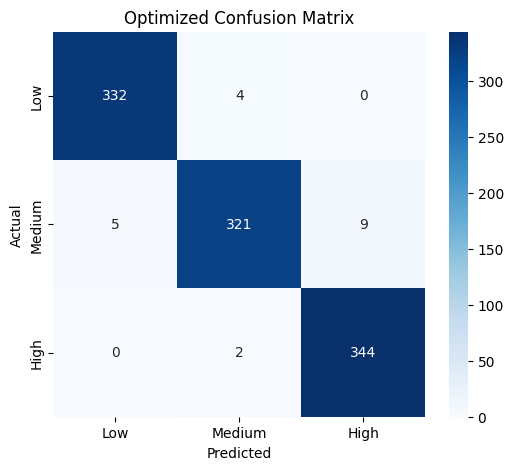

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized Confusion Matrix")
plt.show()

In [ ]:
# Ensure df_clean is defined
df_clean = df.copy()  # Create a copy of df or load it again if necessary

# Ensure 'Reporting_Year / Année' is in datetime format
df_clean['Reporting_Year / Année'] = pd.to_datetime(df_clean['Reporting_Year / Année'], format='%Y', errors='coerce')

# Sort data by year to ensure it's in chronological order for time series analysis
df_clean = df_clean.sort_values(by='Reporting_Year / Année')

# Create time-based features (year, month, and quarter)
df_clean['Year'] = df_clean['Reporting_Year / Année'].dt.year
df_clean['Month'] = df_clean['Reporting_Year / Année'].dt.month
df_clean['Quarter'] = df_clean['Reporting_Year / Année'].dt.quarter

# Create lag features (previous years' releases)
df_clean['Lag_1'] = df_clean['Release to Air - Fugitive'].shift(1)  # Previous year's release
df_clean['Lag_2'] = df_clean['Release to Air - Fugitive'].shift(2)  # Two years ago
df_clean['Lag_3'] = df_clean['Release to Air - Fugitive'].shift(3)  # Three years ago

# Create rolling average for the last 3 years
df_clean['3_year_rolling_avg'] = df_clean['Release to Air - Fugitive'].rolling(window=3).mean()

# Handle missing values in rolling features by filling with median (or other strategy)
df_clean['3_year_rolling_avg'].fillna(df_clean['3_year_rolling_avg'].median(), inplace=True)

# Drop rows with NaN values in the target and lag features (as they are critical for prediction)
df_clean.dropna(subset=['Release to Air - Fugitive', 'Lag_1', 'Lag_2', 'Lag_3'], inplace=True)

# Check the refined dataset
df_clean.head()


<ipython-input-42-1248420bf4a5>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['3_year_rolling_avg'].fillna(df_clean['3_year_rolling_avg'].median(), inplace=True)


,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_destimation,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne),Year,Month,Quarter,Lag_1,Lag_2,Lag_3,3_year_rolling_avg
6226,2000-01-01,3903,355,PETRO-CANADA,Edmonton Refinery,324110,Petroleum refineries,AB,Sherwood Park,53.5505,-113.3589,194-59-2,"7H-Dibenzo[c,g]carbazole",kg,E - Emission Factor,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,1,0.213,0.200,0.292,0.139000
6227,2000-01-01,3903,355,PETRO-CANADA,Edmonton Refinery,324110,Petroleum refineries,AB,Sherwood Park,53.5505,-113.3589,198-55-0,Perylene,kg,E - Emission Factor,0.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,1,0.004,0.213,0.200,0.119000
6228,2000-01-01,3903,355,PETRO-CANADA,Edmonton Refinery,324110,Petroleum refineries,AB,Sherwood Park,53.5505,-113.3589,205-82-3,Benzo[j]fluoranthene,kg,E - Emission Factor,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,1,0.140,0.004,0.213,0.081333
6222,2000-01-01,3903,355,PETRO-CANADA,Edmonton Refinery,324110,Petroleum refineries,AB,Sherwood Park,53.5505,-113.3589,189-55-9,"Dibenzo[a,i]pyrene",kg,E - Emission Factor,0.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,1,0.100,0.140,0.004,0.092333
6229,2000-01-01,3903,355,PETRO-CANADA,Edmonton Refinery,324110,Petroleum refineries,AB,Sherwood Park,53.5505,-113.3589,205-99-2,Benzo[b]fluoranthene,kg,E - Emission Factor,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,1,0.037,0.100,0.140,0.079000


The code prepares a time series dataset for analysis and modeling by first creating a clean copy of the original data. It converts the 'Reporting_Year / Année' column into datetime format to enable time-based operations and then sorts the data chronologically. New features such as year, month, and quarter are extracted to support further analysis. To capture historical patterns, the code generates lag features representing the previous one, two, and three years of the 'Release to Air - Fugitive' values. A 3-year rolling average is also calculated to smooth fluctuations and highlight trends. Any missing values in the rolling average are filled using the median to maintain consistency. Finally, rows with missing values in key columns are dropped to ensure the dataset is ready for accurate and reliable predictions.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and target variable (y)
X = df[['Year', 'Month', 'Quarter', 'Lag_1', 'Lag_2', 'Lag_3', '3_year_rolling_avg']]  # Features
y = df['Release to Air - Fugitive']  # Target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model performance
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R^2: {r2_lr}")


Linear Regression RMSE: 1.9987692855173502e-12
Linear Regression R^2: 1.0


This code trains a Linear Regression model to predict air pollution levels using past values (lags), time features (year, month, quarter), and a 3-year rolling average. It splits the data into training and testing sets, fits the model, makes predictions, and evaluates performance using RMSE (error) and R² (accuracy).RMSE: 1.9987692855173502e-12 and R^2: 1.0.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R^2: {r2_rf}")


Random Forest RMSE: 166.7068805469964
Random Forest R^2: 0.8594053761437599


This code uses a Random Forest Regressor to predict air pollution levels. It trains the model using historical and time-based features, makes predictions on the test data, and evaluates performance using RMSE (prediction error) and R² (accuracy of fit). Random Forest improves prediction by combining multiple decision trees for better accuracy and robustness.RMSE: 166.7068805469964 and R^2: 0.8594053761437599

In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")


XGBoost RMSE: 407.74809412249124
XGBoost R^2: 0.15890404620662013


This code builds an XGBoost regression model to predict air pollution levels. It trains the model using time-based and historical features, makes predictions on the test set, and evaluates performance using RMSE (error) and R² (explained variance). XGBoost is a powerful and efficient boosting algorithm known for delivering high accuracy in regression tasks.RMSE: 407.74809412249124 and R^2: 0.15890404620662013

Conclusion:

Random Forest is the best performing model among the three, as it provides a good balance of accuracy and reasonable error metrics (R² = 0.86 and RMSE = 166.71).

The Linear Regression model has perfect scores, but this could be a result of overfitting or data leakage, so it might not generalize well.

The XGBoost model is performing poorly, as indicated by its high RMSE and low R², and likely requires further tuning or feature engineering to improve.


In [ ]:
# Average the predictions from all models
final_predictions = (y_pred_lr + y_pred_rf + y_pred_xgb) / 3

# Evaluate the final model
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_r2 = r2_score(y_test, final_predictions)

print(f"Final Model RMSE (Average of all models): {final_rmse}")
print(f"Final Model R^2 (Average of all models): {final_r2}")


Final Model RMSE (Average of all models): 173.61216335372998
Final Model R^2 (Average of all models): 0.8475168125141945


This code averages the predictions from three models — Linear Regression, Random Forest, and XGBoost — to create an ensemble prediction. It then evaluates the combined result using RMSE and R² scores. This technique helps to reduce individual model biases and can lead to better overall accuracy and stability in the final prediction.RMSE (Average of all models): 173.61216335372998 and R^2 (Average of all models): 0.8475168125141945

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have large data (X, y), you can use a sample of the data for faster tuning.
# If you want to use the full dataset, skip the next two lines.
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees (reduce for faster search)
    'max_depth': [None, 10, 20, 30],   # Depth of each tree
    'min_samples_split': [2, 5, 10],   # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],     # Min samples at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    'bootstrap': [True, False]         # Whether to use bootstrap samples
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error',
                                   random_state=42, refit=True)

# Fit the random search on the sample data
random_search.fit(X_train_sample, y_train_sample)

# Get the best hyperparameters
print("Best parameters:", random_search.best_params_)

# Use the best model found by RandomizedSearchCV to make predictions
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print(f"R²: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
R²: 0.19274402030837556
Mean Squared Error: 159569.39795347955


This code performs hyperparameter tuning on a Random Forest Regressor using RandomizedSearchCV to improve prediction accuracy efficiently. Here's a short explanation:

First takes a small sample of the training data (10%) to speed up the tuning process. It then defines a set of hyperparameters (like number of trees, tree depth, and split criteria) and uses RandomizedSearchCV to randomly test different combinations across 3-fold cross-validation. Once the best combination of hyperparameters is found, the model is retrained using those settings and used to predict on the test set. Finally, the model's performance is evaluated using R² (explained variance) and Mean Squared Error to assess accuracy.